In [3]:
# Harbinger Package
# version 1.0.9

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/examples/jupyter_harbinger.R")

#loading Harbinger
load_harbinger() 

In [4]:
loadlibrary("reticulate")
source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/examples/ts_tlstm.R")
reticulate::source_python("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/examples/ts_tlstm.py")

Loading required package: reticulate



In [5]:
#loading the example database
data(har_examples)

In [6]:
#Using the time series 1 
dataset <- har_examples[[1]]
head(dataset)

,serie,event
,<dbl>,<lgl>
1,1.0000000,FALSE
2,0.9689124,FALSE
3,0.8775826,FALSE
4,0.7316889,FALSE
5,0.5403023,FALSE
6,0.3153224,FALSE


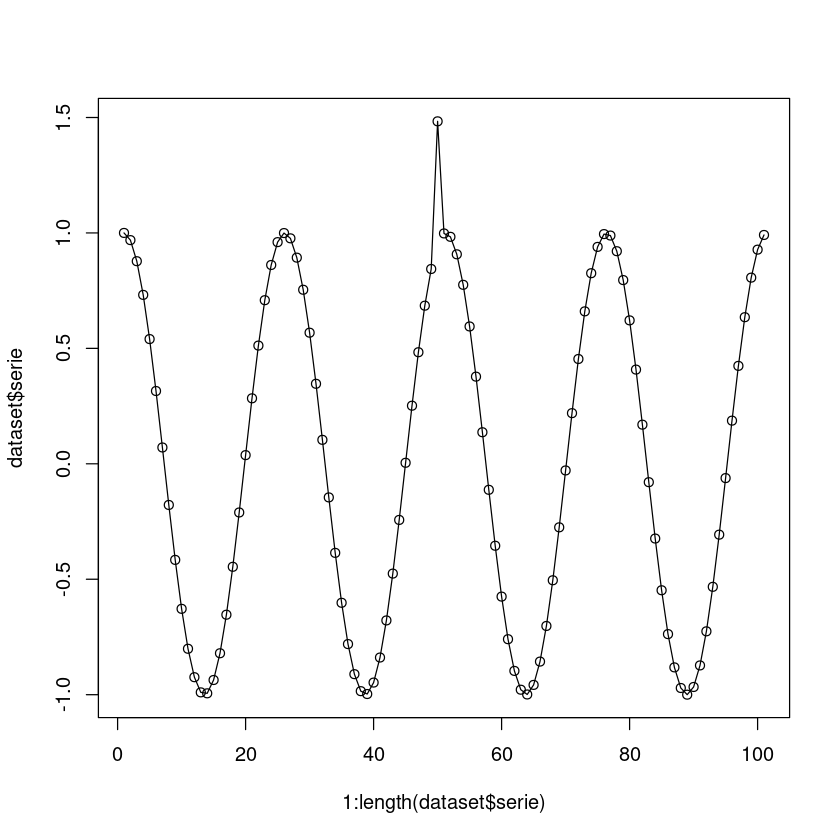

In [7]:
#ploting serie #1

plot(x = 1:length(dataset$serie), y = dataset$serie)
lines(x = 1:length(dataset$serie), y = dataset$serie)

In [8]:
# establishing arima method 
  model <- har_tsreg_sw(ts_tlstm(ts_gminmax(), input_size=4, epochs=10000))

In [9]:
# fitting the model
  model <- fit(model, dataset$serie)

ts_tlstm,0.031



In [10]:
# making detections using fbiad
  detection <- detect(model, dataset$serie)

In [11]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

  idx event    type
1  29  TRUE anomaly
2  50  TRUE anomaly
3  80  TRUE anomaly


In [12]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      1     2    
FALSE     0     98   


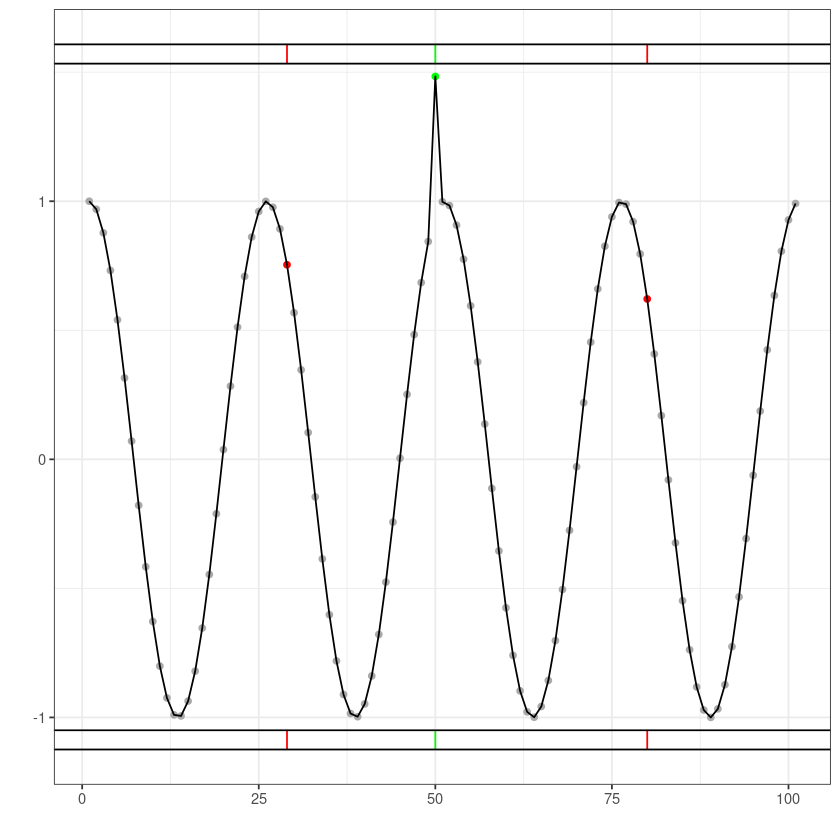

In [13]:
# ploting the results
  grf <- plot.harbinger(model, dataset$serie, detection, dataset$event)
  plot(grf)